## Importing The Packages

In [1]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

## Handle The Missing values

In [4]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoApplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Treating The Null Value

In [5]:
# We will fill the missing values in numeric data type using the mean value of that particular column and categorical data type using the most repeated value

In [6]:

numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [7]:
numerical_features

Index(['ApplicantIncome', 'CoApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
#replace + with non value 
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [10]:
#checking the null values now
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoApplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Now the null value is retreated

## Handling Categorical Values

In [12]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [15]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [17]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [18]:
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)

In [19]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [21]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [22]:
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)

In [23]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [25]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [26]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [28]:
df['CoApplicantIncome']=df['CoApplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [29]:
# dummy columns are created for the categories in Loan_ID
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


In [31]:
df.drop(columns = 'Loan_ID', inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,1,1,0,1,1,3000,0,66,360,1,2,1
3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,1,0,0,1,0,6000,0,141,360,1,2,1


## Balancing The Dataset

In [41]:
from imblearn.combine import SMOTETomek

In [42]:
smote = SMOTETomek(0.90)

In [43]:
#dividing the dataset into dependent and independent y and x respectively

y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [44]:
#creating the new x and y for balance data
x_bal,y_bal = smote.fit_resample(x,y)

In [45]:
#printing the value before and after balancing 
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    365
0    322
Name: Loan_Status, dtype: int64


## Scaling The Data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)

In [48]:
x_bal = pd.DataFrame(x_bal)

In [49]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0,120,360,1,2
1,1,1,1,1,0,4583,1508,128,360,1,0
2,1,1,0,1,1,3000,0,66,360,1,2
3,1,1,0,0,0,2583,2358,120,360,1,2
4,1,0,0,1,0,6000,0,141,360,1,2


## Splitting Data Into Train And Test

In [50]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(411, 11)
(411,)
(203, 11)
(203,)


## MODELLING

## Xgboost Model

In [53]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [54]:
model = GradientBoostingClassifier() 

In [55]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [56]:
yPred = model.predict(x_test)

In [57]:
#confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test ,yPred) )

Confusion matrix
[[ 32  40]
 [  9 122]]


In [58]:
#Classification report
print("Classification report")
print(classification_report (y_test, yPred))

Classification report
              precision    recall  f1-score   support

           0       0.78      0.44      0.57        72
           1       0.75      0.93      0.83       131

    accuracy                           0.76       203
   macro avg       0.77      0.69      0.70       203
weighted avg       0.76      0.76      0.74       203



In [59]:
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)

In [60]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))
print('Training accuracy: ',accuracy_score(y_train,y_pred1))

Testing accuracy:  0.7586206896551724
Training accuracy:  0.9075425790754258


In [61]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,32,40
1,9,122


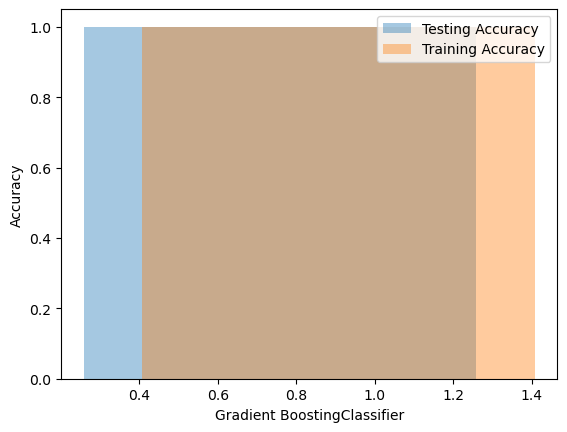

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(accuracy_score(y_test,y_pred), label = 'Testing Accuracy')
sns.distplot(accuracy_score(y_train,y_pred1), label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('Gradient BoostingClassifier')
plt.ylabel('Accuracy')
plt.show()

In [63]:
import joblib
joblib.dump(model,'Forest.pkl')

['Forest.pkl']